# Analytical model for TCP Hybla for satellite IP Networks



In [9]:
import numpy as np
import matplotlib.pyplot as plt

class HyblaAnalytical:
    def __init__(self, p = 0.01, RTT = 25, RTT0 = 25, Wm = 500):
        self.p = p
        self.RTT = RTT
        self.RTT0 = RTT0
        self.rho = RTT/RTT0
        self.Wm = Wm #max packets
        self.W = np.linspace # Big assumption right now, should change it
    
    def L(self, W): # Number of lost data segments in the CA/FR phase.
        return 1 + self.p*(self.W-1)

    def D(self):
        return (2-self.p)**(self.W-1)*2**(-self.W)
    
    def X(self):
        return (1-self.D())*self.W/self.rho

    def LL(self):
        return self.W+(1-self.p)**self.W*(1+2*self.p*self.W)-((1-self.p)*(1-(1-self.p)**(self.W-1)))/(self.p)

    def A(self): # Expected length of time in CA/FR
        return (self.X()+1+self.LL()/self.W)*self.RTT
    
    def L(self):
        return 1+self.p*(self.W-1)
    
    def Z(self):
        return self.X*self.D*self.W+self.rho**2*(self.X+1)*X/2+W/2+D*LL+L-1/p-W

    def B(self): #Steady state throughput
        return (1/self.p + self.W - self.L())/self.A() *1000
    

In [24]:
hyblaInstance = HyblaAnalytical(Wm = 550, RTT = 550, RTT0=25, p = 0.000001)
hyblaInstance.B()

1077446.5733902727

In [25]:
x = np.logspace(-6,-1,100)
y = np.zeros(100)
for i,xi in enumerate(x):
    hyblaInstance.p = xi
    y[i] = hyblaInstance.B()
print(y)

[1.07744657e+06 9.59191645e+05 8.53919323e+05 7.60204312e+05
 6.76777794e+05 6.02510248e+05 5.36396156e+05 4.77540392e+05
 4.25146101e+05 3.78503910e+05 3.36982325e+05 3.00019180e+05
 2.67114027e+05 2.37821360e+05 2.11744581e+05 1.88530634e+05
 1.67865222e+05 1.49468554e+05 1.33091555e+05 1.18512495e+05
 1.05533987e+05 9.39803133e+04 8.36950468e+04 7.45389343e+04
 6.63880102e+04 5.91319183e+04 5.26724174e+04 4.69220517e+04
 4.18029664e+04 3.72458537e+04 3.31890144e+04 2.95775227e+04
 2.63624823e+04 2.35003647e+04 2.09524196e+04 1.86841506e+04
 1.66648477e+04 1.48671720e+04 1.32667852e+04 1.18420206e+04
 1.05735892e+04 9.44431906e+03 8.43892268e+03 7.54379012e+03
 6.74680482e+03 6.03717972e+03 5.40531126e+03 4.84264959e+03
 4.34158294e+03 3.89533480e+03 3.49787239e+03 3.14382524e+03
 2.82841280e+03 2.54737999e+03 2.29693994e+03 2.07372305e+03
 1.87473170e+03 1.69729998e+03 1.53905785e+03 1.39789927e+03
 1.27195379e+03 1.15956125e+03 1.05924910e+03 9.69712249e+02
 8.89794839e+02 8.184739

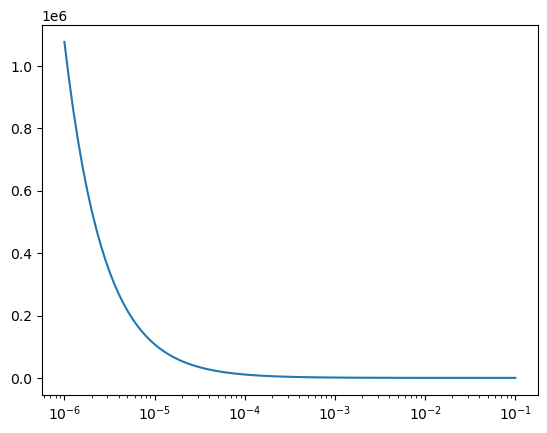

In [30]:
plt.plot(x,y)
plt.semilogx()
plt.show()

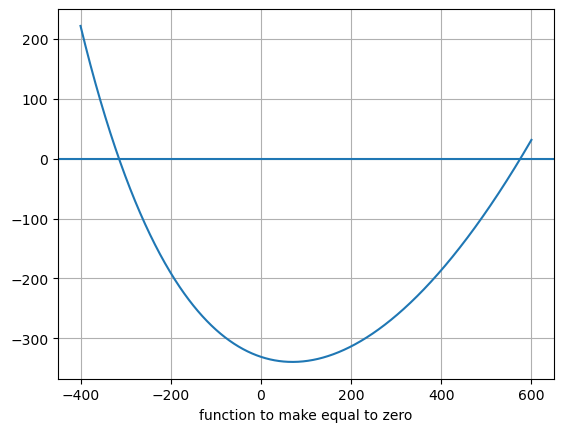

In [31]:
RTT = 550
RTT0 = 25
rho = RTT/RTT0
p = 0.003
W = np.linspace(-400,600,1000)
D = (2-p)**(W-1)/(2**W)
X = (1-D)/(rho**2)*W
L = 1+p*(W-1)
LL = W+(1-p)**W+(1+2*p*W)-(1-p)*(1-(1-p)**(W-1))/p
Z = X*D*W+rho**2*(X+1)*X/2+W/2+D*LL+L-1/p-W
plt.plot(W,Z)
plt.xlabel("W")
plt.xlabel("function to make equal to zero")
plt.grid()
plt.axhline(y=0)
plt.show()

In [35]:
# W must be positive so Z == 0
e = 1
np.where(np.logical_and(Z<=e, Z>=-e))

(array([ 85, 974, 975]),)

In [36]:
A = (X + 1 + LL/W)*RTT
B = (1/p+W-L)/A

In [38]:
B[974]

0.6665795867637965